In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('StudentsPerformance.csv')

In [3]:
dataset.shape

(1000, 9)

In [4]:
dataset['average_score']=((dataset["math_score"]+dataset["reading_score"]+dataset["writing_score"])/3).round()
dataset['results'] = np.where(dataset['average_score']>= 50, '1', '0')
dataset.head()

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,results
0,1,female,group B,bachelor's degree,standard,none,72,72,74,73.0,1
1,2,female,group C,some college,standard,completed,69,90,88,82.0,1
2,3,female,group B,master's degree,standard,none,90,95,93,93.0,1
3,4,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,0
4,5,male,group C,some college,standard,none,76,78,75,76.0,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   gender                       1000 non-null   object 
 2   race_ethnicity               1000 non-null   object 
 3   parental_level_of_education  1000 non-null   object 
 4   lunch                        1000 non-null   object 
 5   test_preparation_course      1000 non-null   object 
 6   math_score                   1000 non-null   int64  
 7   reading_score                1000 non-null   int64  
 8   writing_score                1000 non-null   int64  
 9   average_score                1000 non-null   float64
 10  results                      1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


In [6]:
dataset.describe()

,Unnamed: 0,math_score,reading_score,writing_score,average_score
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,66.08900,69.169000,68.054000,67.762000
std,288.819436,15.16308,14.600192,15.195657,14.258354
min,1.000000,0.00000,17.000000,10.000000,9.000000
25%,250.750000,57.00000,59.000000,57.750000,58.000000
50%,500.500000,66.00000,70.000000,69.000000,68.000000
75%,750.250000,77.00000,79.000000,79.000000,78.000000
max,1000.000000,100.00000,100.000000,100.000000,100.000000


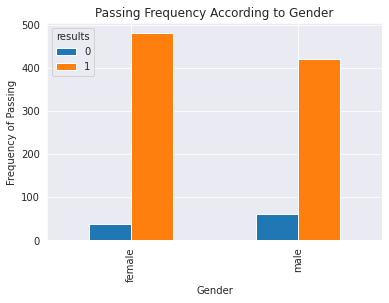

In [7]:
%matplotlib inline
pd.crosstab(dataset.gender,dataset.results).plot(kind='bar')
plt.title('Passing Frequency According to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Passing')
plt.savefig('Passing_Frequency')

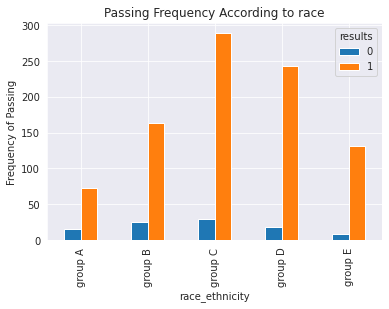

In [8]:
%matplotlib inline
pd.crosstab(dataset.race_ethnicity	,dataset.results).plot(kind='bar')
plt.title('Passing Frequency According to race')
plt.xlabel('race_ethnicity')
plt.ylabel('Frequency of Passing')
plt.savefig('Passing_Frequencyrace_ethnicity')

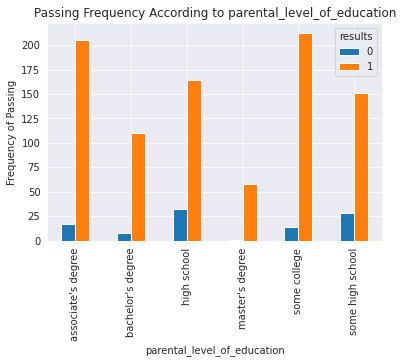

In [9]:
%matplotlib inline
pd.crosstab(dataset.parental_level_of_education,dataset.results).plot(kind='bar')
plt.title('Passing Frequency According to parental_level_of_education')
plt.xlabel('parental_level_of_education')
plt.ylabel('Frequency of Passing')
plt.savefig('Passing_Frequencyparental_level_of_education')

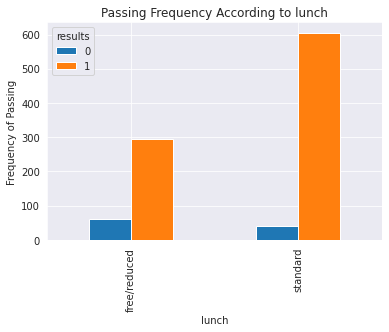

In [10]:
%matplotlib inline
pd.crosstab(dataset.lunch,dataset.results).plot(kind='bar')
plt.title('Passing Frequency According to lunch')
plt.xlabel('lunch')
plt.ylabel('Frequency of Passing')
plt.savefig('Passing_Frequencylunch')

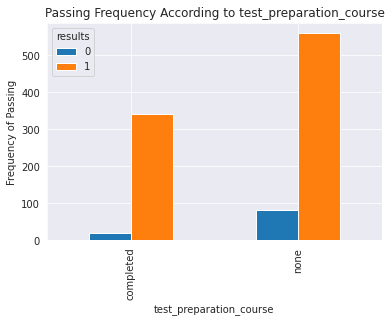

In [11]:
%matplotlib inline
pd.crosstab(dataset.test_preparation_course,dataset.results).plot(kind='bar')
plt.title('Passing Frequency According to test_preparation_course')
plt.xlabel('test_preparation_course')
plt.ylabel('Frequency of Passing')
plt.savefig('Passing_Frequencytest_preparation_course')

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])
dataset['race_ethnicity'] = label_encoder.fit_transform(dataset['race_ethnicity'])
dataset['parental_level_of_education'] = label_encoder.fit_transform(dataset['parental_level_of_education'])
dataset['lunch'] = label_encoder.fit_transform(dataset['lunch'])
dataset['test_preparation_course'] = label_encoder.fit_transform(dataset['test_preparation_course'])

In [13]:
dataset.head()

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,results
0,1,0,1,1,1,1,72,72,74,73.0,1
1,2,0,2,4,1,0,69,90,88,82.0,1
2,3,0,1,3,1,1,90,95,93,93.0,1
3,4,1,0,0,0,1,47,57,44,49.0,0
4,5,1,2,4,1,1,76,78,75,76.0,1


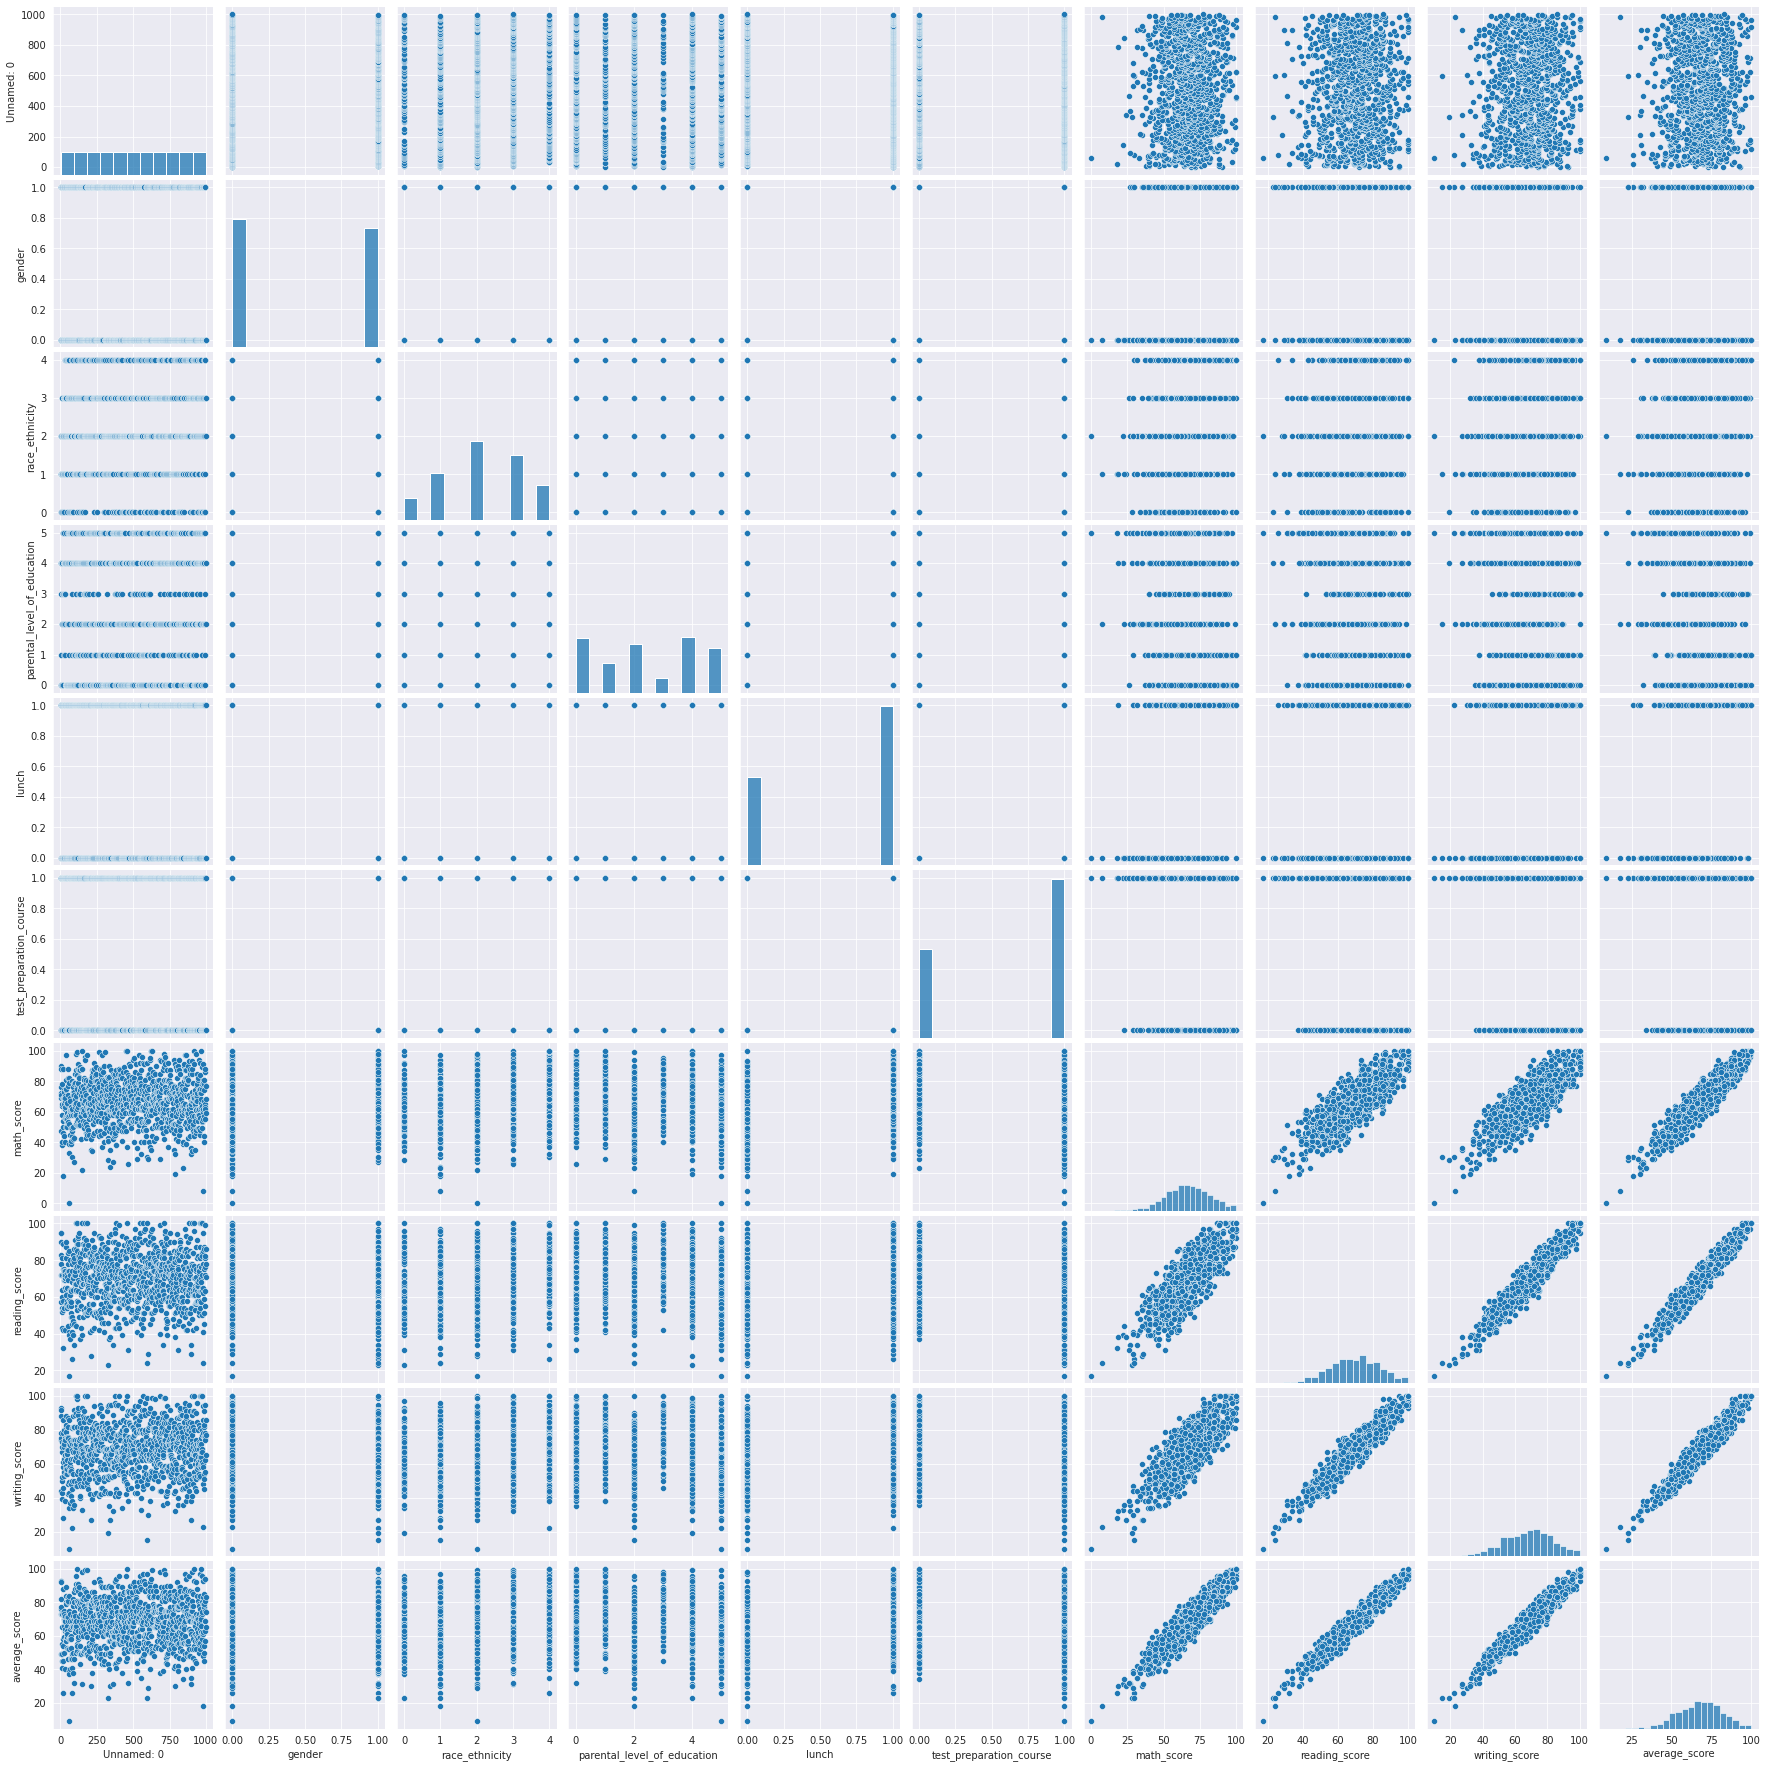

In [14]:
sns.pairplot(dataset)


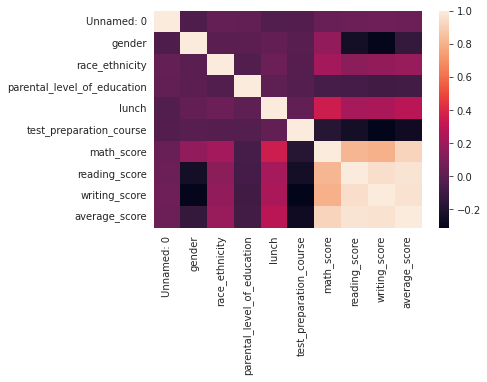

In [15]:
sns.heatmap(dataset.corr())

In [16]:
dataset = dataset.drop(['math_score','writing_score','reading_score'],axis = 1)
dataset.head()

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,average_score,results
0,1,0,1,1,1,1,73.0,1
1,2,0,2,4,1,0,82.0,1
2,3,0,1,3,1,1,93.0,1
3,4,1,0,0,0,1,49.0,0
4,5,1,2,4,1,1,76.0,1


In [17]:
from sklearn.model_selection import train_test_split
y = dataset ['average_score']
x = dataset.drop(['average_score'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [20]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions

array([70., 56., 49., 59., 65., 76., 80., 46., 79., 48., 73., 56., 75.,
       71., 76., 49., 62., 74., 73., 91., 73., 69., 67., 68., 48., 56.,
       80., 73., 70., 26., 62., 76., 62., 62., 76., 69., 70., 73., 75.,
       79., 73., 56., 68., 75., 65., 75., 65., 59., 74., 54., 46., 56.,
       49., 68., 48., 69., 71., 71., 76., 71., 56., 74., 76., 71., 73.,
       58., 71., 65., 73., 68., 69., 71., 69., 73., 56., 71., 69., 69.,
       49., 65., 82., 69., 79., 61., 75., 75., 71., 75., 76., 56., 54.,
       68., 56., 59., 69., 68., 59., 64., 56., 68., 49., 56., 73., 48.,
       71., 75., 76., 70., 75., 79., 74., 75., 47., 59., 79., 74., 76.,
       59., 56., 76., 69., 70., 74., 62., 71., 76., 73., 76., 76., 74.,
       79., 68., 48., 69., 76., 69., 71., 80., 69., 68., 80., 68., 68.,
       73., 59., 48., 30., 48., 58., 79., 73., 73., 74., 69., 76., 70.,
       71., 73., 75., 68., 74., 75., 59., 69., 70., 73., 76., 68., 79.,
       73., 75., 75., 49., 75., 73., 69., 71., 62., 87., 73., 75

In [23]:
y_test

993    69.0
859    77.0
298    45.0
553    68.0
672    74.0
       ... 
679    61.0
722    84.0
215    81.0
653    70.0
150    66.0
Name: average_score, Length: 200, dtype: float64

In [24]:
difference = abs(predictions- y_test)

In [25]:
difference.mean()

10.02

**Average error in marks 10.02**